In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.crowdsourcing import Crowdsourcing
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1']*15
o_space = {i:[0.0, 1.0] for i in bidder}
a_space = {i:[0.0, 0.75] for i in bidder}

param_prior = {'distribution':'uniform'}
param_util = {
    'tiebreaking':'lose', 
    'type':'valuation', 
    'prices': [0.7, 0.3]}

# parameter approximation game
n = 128
m = 128

# create mechanism
mechanism = Crowdsourcing(bidder, o_space, a_space, param_prior, param_util)
print(mechanism.own_gradient)

# create approximation game
game = Game(mechanism, n, m)

**Learner**
Specify Learning Algorithm

In [6]:
# parameter learner
max_iter = int(2e3)
tol = 1e-5
steprule_bool = True
eta = 10
beta = 1/20

learner = SODA(max_iter, tol, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol)
#learner = POGA(max_iter, tol, steprule_bool, eta, beta)

Run Learning Algorithm

In [1]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies)

NameError: name 'game' is not defined

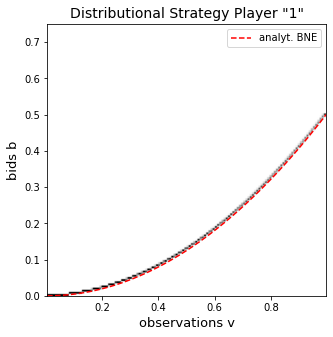

In [23]:
x = np.linspace(0.0,1,100)

n_bidder = mechanism.n_bidder
beta = lambda x: param_util["price"][0] * (n_bidder-1)/n_bidder*x**n_bidder\
               + param_util["price"][0] * ((n_bidder-2)*x**(n_bidder-1) - (n_bidder-1)**2/n_bidder * x **n_bidder)
    
strategies['1'].plot(False, beta(x))

### Mixed Strategy

In [ ]:
x = np.linspace(0,1,100)

In [ ]:
mechanism.get_bne('1',x)

In [ ]:
(mechanism.o_space['1'] == [0, 1] and mechanism.type == 'valuation' and
                len(mechanism.set_bidder) == 1 and (mechanism.prices > 0).sum() <= 2)

In [ ]:
mechanism.get_bne(i, obs[mechanism.bidder.index(i)])

In [ ]:
mechanism.set_bidder

In [ ]:
 mechanism.get_bne('1', obs[mechanism.bidder.index('1')])

In [ ]:
plt.scatter(obs[0], bne[0])

In [ ]:
strategies['1'].x = np.array(strategies['1'].history[7:]).mean(axis=0)
grad = soda.compute_gradient(strategies, game, '1')
br = strategies['1'].best_response(grad)
print('relative utility loss', round((1 - (grad * strategies['1'].x).sum()/(grad * br).sum())*100,2),'%')

In [ ]:
strategies['1'].plot(False, beta(x))

### Gradient

In [ ]:
for i in range(200, 500, 20):
    strategies['1'].x = strategies['1'].history[i]
    grad = soda.compute_gradient(strategies, game, '1')
    plt.plot(range(m), grad[50], alpha = 0.001*(i-199), color='k')

### Movie

In [ ]:
fig, ax = plt.subplots()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(2000):
    im = ax.imshow(strategies['1'].history[i].T, animated=True,  origin="lower", cmap="Greys",)
    if i == 0:
        ax.imshow(strategies['1'].history[i].T,  origin="lower", cmap="Greys",)  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=25, blit=True, repeat=False)

In [ ]:
f = r"crowdsourcing_anim_random_tie_5fps.gif" 
writergif = animation.PillowWriter(fps=5) 
ani.save(f, writer=writergif)

In [ ]:
np.abs(1- (self.x * gradient).sum()
                / ((self.best_response(gradient) * gradient).sum() 

In [ ]:
grad

In [ ]:
plt.matshow(br)

In [ ]:
x = np.linspace(0.5,1,100)
bne = lambda c, v1: 8*c*(3*v1 -2) + 4*np.log(c)*(3-5*v1) + 8*(2-3*v1)
strategies['1'].plot(True, None)

### Compare with Numerical Solution

In [ ]:
u1 = mechanism.draw_values(250)[0]
bids1 = strategies['1'].bid(u1)

x = np.linspace(0.5,1,100)

In [ ]:
plt.scatter(u1, bids1, s=5, label='SODA - losing', c='k')
plt.plot(x, bne(x, price[0]), linestyle='--', color='r', linewidth=2, label='BNE')
plt.grid(alpha=0.4)
plt.legend()
plt.title('Crowdsourcing - Prices (0.6, 0.4), 3 agents')
plt.show()